# First Neural Network
Built with https://www.youtube.com/watch?v=JHWqWIoac2I as tutorial.
I am using the dataset from https://gist.github.com/netj/8836201.

I did this project to learn, hence all the notes.

The goal is to input 4 features of a flower and return an output of which flower the neural network thinks they belong to, out of three flowers. 

In [171]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

## Neural Network Structure

1. Input layer (4 features of flower) sends inputs to hidden layer 1
2. HL1 sends data to hidden layer 2
3. HL2 sends data to output layer
4. Output layer decides which of the three flowers is most likely

In [172]:
#Create a Model 
class Model(nn.Module):
    #The hidden layer numbers are fluid. You can change them based on how much you think you'll need
    def __init__(self, inputs=4, hl1 = 8, hl2 = 8, output=3):
        super().__init__() #instantiate the model
        #fc is just the standard variable name for a fully connected layer
        self.fc1 = nn.Linear(inputs, hl1)
        self.fc2 = nn.Linear(hl1, hl2)
        self.out = nn.Linear(hl2, output)

    #pushes data through the layers
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
        

In [173]:
#manual seed for randomisation 
torch.manual_seed(32)

#Create instance of Model
model = Model()

In [174]:
#Put csv of data into dataframe
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [175]:
#Swapping class names for ints 0-2
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

my_df #Just shows the dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [176]:
#x typically represents the data you are using to make the prediction, and y represents the possible prediction outcomes
x = my_df.drop(['variety'], axis=1)
y = my_df['variety']

In [177]:
#convert to numpy arrays
x = x.values
y = y.values


In [178]:
from sklearn.model_selection import train_test_split

In [179]:
#Train Test Split randomly splits x and y into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [180]:
#Convert randomized sets to tensors (long for int, float for floats) 
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


The nn.CrossEntropyLoss() function works by plugging the logits (model's predicted values) into the mathematical Cross Entropy function and calculates the differences between the results and the initial logits. This assesses the accuracy of the predictions.

Epochs = a run through the training data

In [181]:
#Finds the error by putting the predicted values into cross entropy function
criterion = nn.CrossEntropyLoss()
#Adam Optimizer. lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [182]:
# Train the model 
epochs = 130
losses = []
for i in range (epochs):
    y_prediction = model.forward(x_train) #chucks training data through model
    loss = criterion(y_prediction, y_train)  #result of crossentropyloss
    losses.append(loss.detach().numpy()) #saves loss to losses[]

    #Print results every 10 epochs
    if i % 10 == 0:
        print (f'Epoch: {i} and loss {loss}')

    #BackPropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss 1.0631177425384521
Epoch: 10 and loss 0.8529144525527954
Epoch: 20 and loss 0.7415196895599365
Epoch: 30 and loss 0.6668492555618286
Epoch: 40 and loss 0.5850216746330261
Epoch: 50 and loss 0.461078941822052
Epoch: 60 and loss 0.26744329929351807
Epoch: 70 and loss 0.13584904372692108
Epoch: 80 and loss 0.09010109305381775
Epoch: 90 and loss 0.07374871522188187
Epoch: 100 and loss 0.06676320731639862
Epoch: 110 and loss 0.0632101371884346
Epoch: 120 and loss 0.06106076389551163


Text(0.5, 0, 'Epochs')

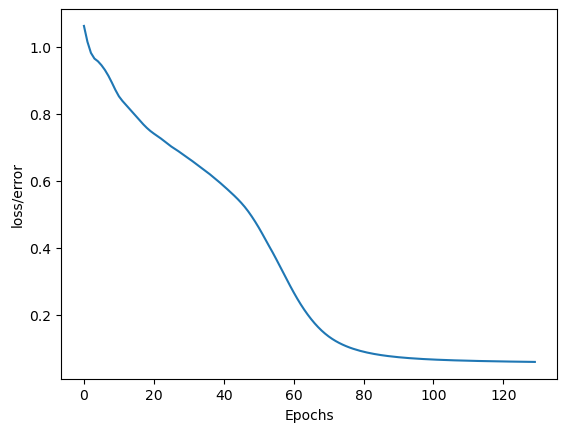

In [183]:
#Graph out the losses
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [184]:
#Evaluate actual test data instead of training data
with torch.no_grad(): # turns off back propogation
    y_eval = model.forward(x_test) #chucks test data through model
    loss = criterion(y_eval, y_test)

In [185]:
loss

tensor(0.0369)

In [186]:
loss

tensor(0.0369)

In [187]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            guess = 'Setosa'
        elif y_test[i] == 1:
            guess = 'Vernicolor'
        else:
            guess = 'Virginica'
        
        #Prints what network thinks the flower is
        print(f'{i+1}.) \t {guess} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'The model got {correct} correct!')

1.) 	 Vernicolor 	 1
2.) 	 Setosa 	 0
3.) 	 Setosa 	 0
4.) 	 Vernicolor 	 1
5.) 	 Virginica 	 2
6.) 	 Virginica 	 2
7.) 	 Setosa 	 0
8.) 	 Setosa 	 0
9.) 	 Vernicolor 	 1
10.) 	 Setosa 	 0
11.) 	 Vernicolor 	 1
12.) 	 Virginica 	 2
13.) 	 Vernicolor 	 1
14.) 	 Vernicolor 	 1
15.) 	 Virginica 	 2
16.) 	 Virginica 	 2
17.) 	 Vernicolor 	 1
18.) 	 Virginica 	 2
19.) 	 Vernicolor 	 1
20.) 	 Setosa 	 0
21.) 	 Setosa 	 0
22.) 	 Virginica 	 2
23.) 	 Virginica 	 2
24.) 	 Setosa 	 0
25.) 	 Setosa 	 0
26.) 	 Vernicolor 	 1
27.) 	 Setosa 	 0
28.) 	 Virginica 	 2
29.) 	 Setosa 	 0
30.) 	 Setosa 	 0
The model got 30 correct!
